NLP Draft 1:

Read in the 10-K filing as a .txt. Tokenzie the txt by word. Create a df of each token, and their count in the txt. Merge this DF with the Loughran and McDonald Master Dictionary of financial words word in Master Dictionary. By doing this we create a new DateFrame object that only includes words that appeared in both the filing and the Loughran and McDonald Master Dictionary (ie, words that have some sentiment rating). 

Much of this analysis is based on research conducted by Tim Loughran and Bill McDonald's 2011 Paper "When is a Liability not a Liability". Their research concluded that almost three-fourths of the words identified as negative by traditional lexicons are words typically not considered negative in financial contexts. Thus, it is important we use a financial dictionary such as theirs.

For the sentiment analysis portion of this portion, I decided to follow a path similar to Andreas Chouliaras'. His research in "The Pessimism Factor: SEC EDGAR Form 10-K Textual Analysis and Stock Returns" provides the formula I use to measure sentiment. After analyzing 20,000 annual filings he found that comparing (pessimism percentage) change across periods lead to insight on future stock performance. Chouliaras measure sentiment using the difference between the percentage of words in a text with negative sentiment and the percentage of words in a text with positive sentiment. 

In [60]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
from itertools import groupby
import matplotlib.pyplot as plt
%matplotlib inline
from nltk import word_tokenize

In [26]:
# This is the 10-K Lexicon that we need
wordDict = pd.read_csv('LoughranMcDonald_MasterDictionary_2014.csv')

In [27]:
# There are a lot of columns that we don't use. For this analysis we will only use words with a positive or negative rating.
wordDict = wordDict[['Word', 'Negative', 'Positive']]

In [28]:
filing = open('Sample 10-k.txt', encoding='utf8') # This is the string version.

In [29]:
filing = filing.read()

In [30]:
x = word_tokenize(filing) # Okay, now we have a list of each word...

In [67]:
filtered_words = [word for word in x if word not in stopwords.words('english')]
print("Before removing stop words: ", len(x))
print("After removing stop words: ", len(filtered_words))

print("Removed", (len(x) - len(filtered_words)), "stop words!")
# We only need to remove the stop words for calculating our pessimism level.
numWords = len(filtered_words)

57019
41165
Removed 15854 stop words!


In [31]:
x.sort() # Okay, now we are sorted

In [41]:
# counts is a list of the counts of each element of x (only when x is sorted!)
counts = [len(list(group)) for key, group in groupby(x)]

In [42]:
s = set(x)

In [43]:
s = sorted(s)

In [44]:
# create a df of each word (token) and the number of times it appears
filedf = pd.DataFrame(data = [s, counts])
filedf = filedf.T # we have to Transpose
filedf.columns = ['Word', 'count']

In [45]:
# merge the wordDict and filedf so we only have a df of the words that appear in our lexicon
df = pd.merge(wordDict, filedf, on = 'Word')

In [46]:
df.head()

,Word,Negative,Positive,count
0,ability,0,0,38
1,able,0,2009,15
2,about,0,0,15
3,above,0,0,9
4,abroad,0,0,1


Things are looking better, but we still have values in our DF with no sentiment value... IE 'and'.

In [47]:
df = df[(df['Positive'] + df['Negative'] >= 1)]

In [48]:
# According to the Master Dictionary, sentiment ratings values are the year in which the word was added to the dictionary...
df.loc[df['Negative'] != 0, 'Negative'] = 1
df.loc[df['Positive'] != 0, 'Positive'] = 1

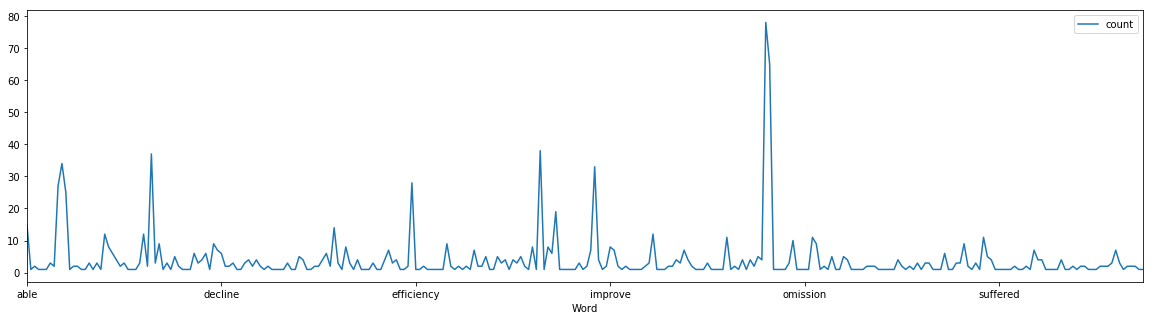

In [49]:
# sentiment words and their frquency
df.plot(x='Word',y='count', figsize=(20, 5))

In [50]:
df['count'].max()

78

In [51]:
df[(df['count'] == 78)]
# The most common word is 'loss' which appeared 78 times.

,Word,Negative,Positive,count
1590,loss,1,0,78


In [68]:
negCount = df[(df['Negative'] == 1)]['count'].sum()
posCount = df[(df['Positive'] == 1)]['count'].sum()

In [74]:
negPerc = negCount / numWords
posPerc = posCount / numWords
pessimism = (round(negPerc - posPerc, 4)) * 100
print("Pessimism: ", pessimism,"%")

Pessimism:  1.34 %


Based on Chouliaras' Reserach, the average 10-K has 0.7% positive words, 1.4% negative words, which means an average pessimism of 0.7%.
Here, the Pessimism is much higher...

My sentiment rating is actually lower than average because I have not removed all the non word symbols (eg, numbers, '%' '$').